<a href="https://colab.research.google.com/github/jasonhadinata/data-science-course-2021/blob/main/The_Data_Science_Course_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 5 Advanced Statistical Methods

## Initialisation

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import patsy

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

from sklearn.feature_selection import f_regression
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

from scipy.stats import kstest, jarque_bera, describe

## S32L187 Simple Linear Regression with statsmodels

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

In this exercise, the dependent variable is 'price', while the independent variables is 'size'.

Good luck!

In [ ]:
df = pd.read_csv('real_estate_price_size.csv')

df

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [ ]:
df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


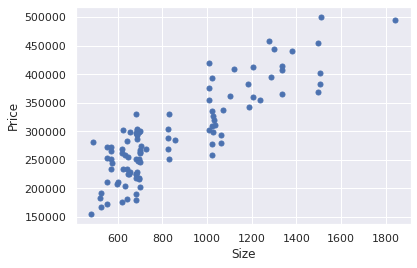

In [ ]:
plt.plot(df['size'], df['price'], 'o', markersize=5)

plt.xlabel('Size')
plt.ylabel('Price')

plt.show()

In [ ]:
model = smf.ols('price ~ size', df = df)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           8.13e-31
Time:                        04:04:27   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is a good fit as seen by its high $R^2$.

The model parameters are significant ($\alpha=0.05$).

The data is not significantly not normal according to the $p$-value ($\alpha=0.05$). The obtained model is:

$$\text{price} = 1.019\cdot10^5 + 223.1787\cdot\text{size}$$

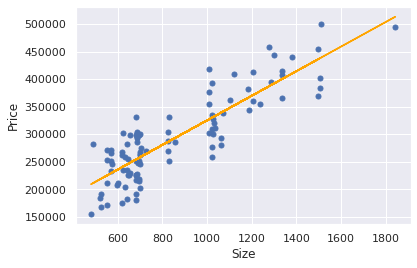

In [ ]:
plt.plot(df['size'], df['price'], 'o', markersize=5)

plt.plot(df['size'], result.predict(df['size']), color='orange')

plt.xlabel('Size')
plt.ylabel('Price')

plt.show()

## S33L195 Multiple Linear Regression with statsmodels

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

In [ ]:
df = pd.read_csv('real_estate_price_size_year.csv')

df

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [ ]:
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [ ]:
y = df['price']
X = df[['size', 'year']]
X = sm.add_constant(X)

model = sm.OLS(y,X)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           2.77e-32
Time:                        03:59:55   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is a good fit as seen by its high $R^2$.

The model parameters are significant ($\alpha=0.05$).

The data is not significantly not normal according to the $p$-value ($\alpha=0.05$). The obtained model is:

$$\text{price} = -5.772\cdot10^6 + 227.7009\cdot\text{size} + 2916.7853\cdot\text{year}$$

## S33L204 Categorical Multiple Linear Regression with statsmodels

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

- Regarding the 'view' variable:

There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

In [ ]:
df = pd.read_csv('real_estate_price_size_year_view.csv')

df

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [ ]:
df['view'] = df['view'].map({'Sea view' : 0,
                                 'No sea view' : 1})

df

,price,size,year,view
0,234314.144,643.09,2015,1
1,228581.528,656.22,2009,1
2,281626.336,487.29,2018,0
3,401255.608,1504.75,2015,1
4,458674.256,1275.46,2009,0
...,...,...,...,...
95,252460.400,549.80,2009,0
96,310522.592,1037.44,2009,1
97,383635.568,1504.75,2006,1
98,225145.248,648.29,2015,1


In [ ]:
df.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.510000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,1.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


In [ ]:
y = df['price']
X = df[['size', 'year', 'view']]
X = sm.add_constant(X)

model = sm.OLS(y,X)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           1.02e-50
Time:                        08:13:28   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.341e+06   9.94e+05     -5.373      0.000   -7.31e+06   -3.37e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view       -5.673e+04   4627.695    -12.258      0.000   -6.59e+04   -4.75e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is a good fit as seen by its high $R^2$.

The model parameters are significant ($\alpha=0.05$).

The data is significantly not normal according to the $p$-value ($\alpha=0.05$). The obtained model is:

$$\text{price} = -5.772\cdot10^6 + 227.7009\cdot\text{size} + 2916.7853\cdot\text{year}$$

## S34L211 Simple Linear Regression with sklearn

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

In [ ]:
df = pd.read_csv('real_estate_price_size.csv')

X = df[['size']]
y = df['price']

reg = LinearRegression()
reg.fit(X.values, y)

r2 = reg.score(X.values, y)
coef = np.array([reg.intercept_, reg.coef_], dtype='object')

print(f'R2 = {r2}')
print(f'The coefficients are {coef[0]}, {coef[1]}')

R2 = 0.7447391865847586
The coefficients are 101912.60180122897, [223.17874259]


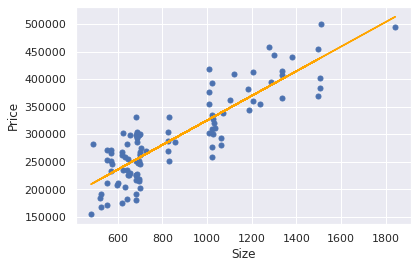

In [ ]:
plt.plot(df['size'], df['price'], 'o', markersize=5)

plt.plot(X, reg.predict(X.values.reshape(-1,1)), color='orange')

plt.xlabel('Size')
plt.ylabel('Price')

plt.show()

In [ ]:
print(f'The price of a 750 sq ft. apartment is expected to be {reg.predict(np.array([[750]]))[0]}')

The price of a 750 sq ft. apartment is expected to be 269296.6587471846


## S34L214 Adjusted R-squared with sklearn

Using the code from the lecture, create a function which will calculate the adjusted R-squared for you, given the independent variable(s) (x) and the dependent variable (y).

Check if you function is working properly.

Please solve the exercise at the bottom of the notebook (in order to check if it is working you must run all previous cells).

In [ ]:
df = pd.read_csv('1.02. Multiple linear regression.csv')

df

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [ ]:
df.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [ ]:
X = df[['Rand 1,2,3', 'SAT']]
y = df['GPA']

reg = LinearRegression()y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([-0.00826982,  0.00165354])

In [ ]:
reg.intercept_

0.2960326126490922

In [ ]:
reg.score(X,y)

0.4066811952814283

In [ ]:
n,p = X.shape

1-(1-reg.score(X,y))*(n-1)/(n-p-1)

0.3920313482513401

## S34L216 p-value with sklearn

In [ ]:
df = pd.read_csv('/content/1.02. Multiple linear regression.csv')

df.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [ ]:
X = df[['SAT', 'Rand 1,2,3']]
y = df['GPA']

p = feature_selection.f_regression(X, y)[1]

print(f'SAT p-value = {p[0].round(3)}')
print(f'Rand 1,2,3 p-value = {p[1].round(3)}')

SAT p-value = 0.0
Rand 1,2,3 p-value = 0.676


## S34L218 Multiple Linear Regression with sklearn

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Display the intercept and coefficient(s)
-  Find the R-squared and Adjusted R-squared
-  Compare the R-squared and the Adjusted R-squared
-  Compare the R-squared of this regression and the simple linear regression where only 'size' was used
-  Using the model make a prediction about an apartment with size 750 sq.ft. from 2009
-  Find the univariate (or multivariate if you wish - see the article) p-values of the two variables. What can you say about them?
-  Create a summary table with your findings

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

In [ ]:
df = pd.read_csv('/content/real_estate_price_size_year.csv')

df.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [ ]:
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


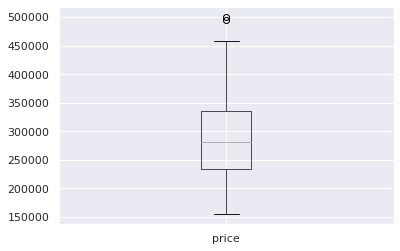

In [ ]:
df.boxplot(column=[df.columns[0]])

plt.show()

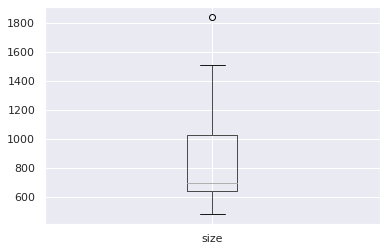

In [ ]:
df.boxplot(column=[df.columns[1]])

plt.show()

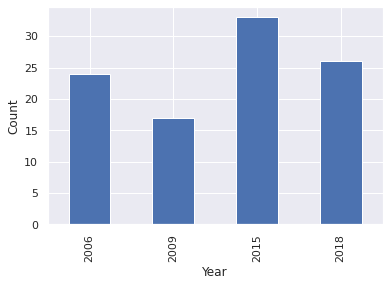

In [ ]:
df['year'].value_counts().sort_index().plot(kind='bar', ylabel='Count', xlabel='Year')

plt.show()

In [ ]:
y, X = patsy.dmatrices('price ~ size + year - 1', data=df, return_type='dataframe')

In [ ]:
reg = LinearRegression()

reg.fit(X,y)

print(f'The predicted value for 750 sq ft real estate in 2009 is {reg.predict(np.array([[750, 2009]]))[0,0].round(2)}')

The predicted value for 750 sq ft real estate in 2009 is 258330.34


In [ ]:
print(f'The intercept is {reg.intercept_[0].round(2)}')
print(f'The coefficients are {reg.coef_[0][0]} for size and {reg.coef_[0][1]} for year')

The intercept is -5772267.02
The coefficients are 227.70085400747647 for size and 2916.7853268380372 for year


In [ ]:
print(f'The R2 is {reg.score(X, y)}')
print(f'The adjusted R2 is {1 - (1-reg.score(X,y)) * (X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)}')

The R2 is 0.7764803683276794
The adjusted R2 is 0.7718717161282501


In [ ]:
p = feature_selection.f_regression(X, y.to_numpy().ravel())[1]

pd.DataFrame({
    'features' : X.columns.values,
    'coefficients' : reg.coef_[0],
    'p-vals' : p.round(3)
})

,features,coefficients,p-vals
0,size,227.700854,0.000
1,year,2916.785327,0.357


## S34L222 Feature Scaling with sklearn

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. This exercise is very similar to a previous one. This time, however, **please standardize the data**.

Apart from that, please:
-  Display the intercept and coefficient(s)
-  Find the R-squared and Adjusted R-squared
-  Compare the R-squared and the Adjusted R-squared
-  Compare the R-squared of this regression and the simple linear regression where only 'size' was used
-  Using the model make a prediction about an apartment with size 750 sq.ft. from 2009
-  Find the univariate (or multivariate if you wish - see the article) p-values of the two variables. What can you say about them?
-  Create a summary table with your findings

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

In [ ]:
df = pd.read_csv('/content/real_estate_price_size_year.csv')

df.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [ ]:
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [ ]:
X = df[['size', 'year']]
y = df['price']

In [ ]:
scaler = StandardScaler()

scaler.fit(X)

scaled_X = scaler.transform(X)

In [ ]:
reg = LinearRegression()

reg.fit(scaled_X, y)

print(f'The predicted value for 750 sq ft real estate in 2009 is {reg.predict(scaler.transform(np.array([[750, 2009]])))[0].round(2)}')

The predicted value for 750 sq ft real estate in 2009 is 258330.34


In [ ]:
print(f'The R2 value is {reg.score(scaled_X, y)}')
print(f'The adjusted R2 value is {1 - (1-reg.score(scaled_X, y)) * (X.shape[0]-1) / (X.shape[0]-X.shape[1]-1)}')

The R2 value is 0.7764803683276793
The adjusted R2 value is 0.77187171612825


In [ ]:
f_regression(scaled_X, y)[1]

array([8.12763222e-31, 3.57340758e-01])

In [ ]:
pd.DataFrame({
    'features' : np.insert(X.columns.values, 0, 'bias'),
    'weights' : np.array([reg.intercept_, reg.coef_[0], reg.coef_[1]])
})

,features,weights
0,bias,292289.470160
1,size,67501.576142
2,year,13724.397082


## S34L229 Dummies and Variance Inflation Factor with sklearn

### **Importing and Cleaning**

In [ ]:
raw_df = pd.read_csv('/content/1.04. Real-life example.csv')

raw_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
raw_df.shape

(4345, 9)

In [ ]:
raw_df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Drop the Model column.

In [ ]:
raw_df.drop('Model', axis=1, inplace=True)

Price and EngineV has missing entries since their count is less than the shape. Drop the missing entries.

In [ ]:
dropped_df = raw_df.dropna(axis=0)
dropped_df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


The maximum value for EngineV seems too big for engine volume. Only keep those with EngineV $<$ 6.5.

In [ ]:
ev_dropped_df = dropped_df[dropped_df['EngineV'] < 6.5]
ev_dropped_df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4002,4002.000000,4002,4002.000000,4002.000000,4002,4002,4002.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,875,NaN,1522,NaN,NaN,1854,3637,NaN
mean,NaN,19615.045967,NaN,163.384058,2.466724,NaN,NaN,2006.395302
std,NaN,25870.138722,NaN,103.476924,0.973586,NaN,NaN,6.696077
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


**CHECK NORMALITY**

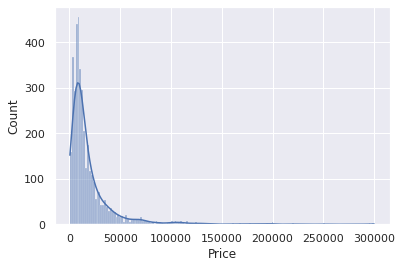

In [ ]:
sns.histplot(ev_dropped_df['Price'], kde=True)

plt.show()

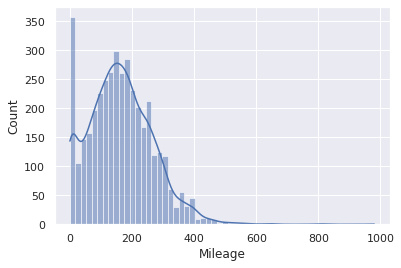

In [ ]:
sns.histplot(ev_dropped_df['Mileage'], kde=True)

plt.show()

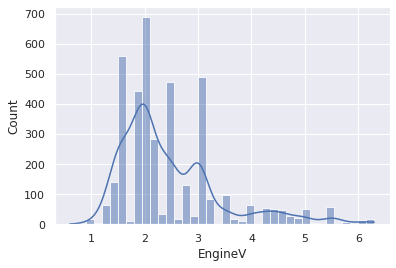

In [ ]:
sns.histplot(ev_dropped_df['EngineV'], kde=True)

plt.show()

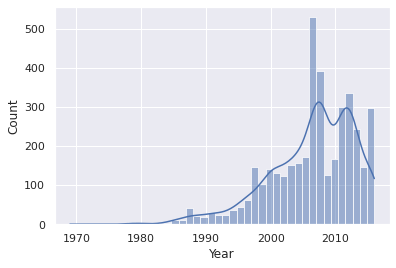

In [ ]:
sns.histplot(ev_dropped_df['Year'], kde=True)

plt.show()

Price seems to be significantly positively skewed. Apply log transformation.

Truncate the top 1% of Mileage and bottom 1% of Year to limit outliers.

In [ ]:
transformed_df = ev_dropped_df.copy()

transformed_df = transformed_df[(transformed_df['Mileage'] <= np.quantile(transformed_df['Mileage'], 0.99)) &
                                (transformed_df['Year'] >= np.quantile(transformed_df['Year'], 0.01))]

transformed_df['log Price'] = np.log(transformed_df['Price'])

transformed_df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


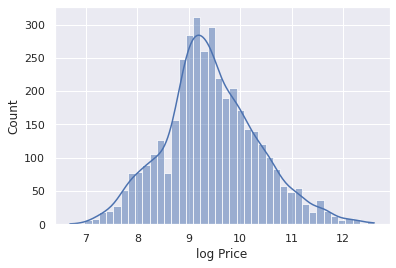

In [ ]:
sns.histplot(transformed_df['log Price'], kde=True)

plt.show()

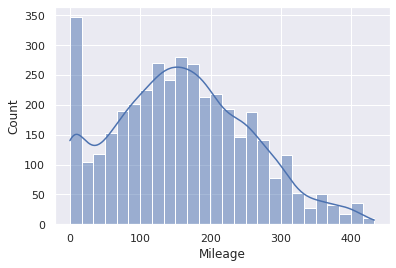

In [ ]:
sns.histplot(transformed_df['Mileage'], kde=True)

plt.show()

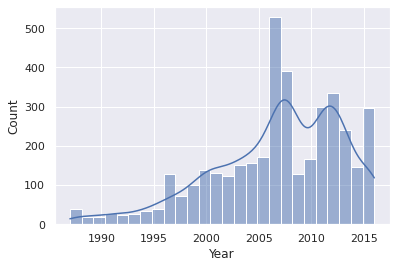

In [ ]:
sns.histplot(transformed_df['Year'], kde=True)

plt.show()

**EXPLORE LINEARITY**

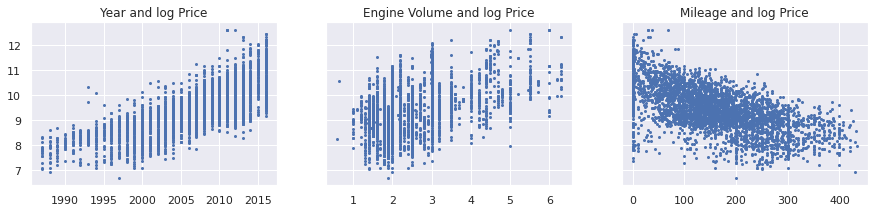

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.plot(transformed_df['Year'], transformed_df['log Price'], 'o', markersize=2)
ax1.set_title('Year and log Price')

ax2.plot(transformed_df['EngineV'], transformed_df['log Price'], 'o', markersize=2)
ax2.set_title('Engine Volume and log Price')

ax3.plot(transformed_df['Mileage'], transformed_df['log Price'], 'o', markersize=2)
ax3.set_title('Mileage and log Price')

plt.show()

**CHECK MULTICOLINEARITY**

In [ ]:
X = transformed_df[['Year', 'EngineV', 'Mileage']]

pd.DataFrame({
    'features' : X.columns.values,
    'VIF' : [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

,features,VIF
0,Year,10.358966
1,EngineV,7.401865
2,Mileage,3.710217


Year has high variance inflation factor. Remove it from the analysis and recheck.

In [ ]:
X = transformed_df[['EngineV', 'Mileage']]

pd.DataFrame({
    'features' : X.columns.values,
    'VIF' : [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

,features,VIF
0,EngineV,2.648724
1,Mileage,2.648724


Drop the Year feature.

In [ ]:
transformed_df.drop('Year', axis=1, inplace=True)

Move log Price to the left and drop Price.

In [ ]:
df = transformed_df.copy()

df.drop(['Price'], axis=1, inplace=True)

df = df[['log Price', 'Mileage', 'EngineV', 'Brand', 'Body', 'Engine Type', 'Registration']]

df.reset_index(drop=True, inplace=True)

df

,log Price,Mileage,EngineV,Brand,Body,Engine Type,Registration
0,8.342840,277,2.0,BMW,sedan,Petrol,yes
1,8.974618,427,2.9,Mercedes-Benz,van,Diesel,yes
2,9.495519,358,5.0,Mercedes-Benz,sedan,Gas,yes
3,10.043249,240,4.2,Audi,crossover,Petrol,yes
4,9.814656,120,2.0,Toyota,crossover,Petrol,yes
...,...,...,...,...,...,...,...
3920,9.350102,163,2.5,Volkswagen,van,Diesel,yes
3921,9.792556,35,1.6,Toyota,sedan,Petrol,yes
3922,11.736069,9,3.0,Mercedes-Benz,sedan,Diesel,yes
3923,8.779557,1,3.5,BMW,sedan,Petrol,yes


### **Exercise**

**CREATE DUMMY VARIABLES**

In [ ]:
dummied_df = pd.get_dummies(df, drop_first=True)

dummied_df

,log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3921,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3922,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3923,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [ ]:
dummied_df.describe(include='all')

,log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000
mean,9.436260,159.411720,2.471855,0.160000,0.201274,0.077197,0.110828,0.128408,0.217325,0.065987,0.097070,0.377325,0.095287,0.155924,0.146242,0.025987,0.365096,0.907771
std,0.919825,96.415075,0.977736,0.366653,0.401003,0.266938,0.313959,0.334586,0.412478,0.248291,0.296091,0.484779,0.293648,0.362829,0.353394,0.159117,0.481518,0.289386
min,6.684612,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.881836,90.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.371609,156.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.998798,225.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,12.611538,433.000000,6.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**PART 1**

Calculate the variance inflation factors for all variables contained in data_preprocessed. Anything strange?

In [ ]:
pd.DataFrame({
    'feature' : dummied_df.columns.values,
    'VIF' : [variance_inflation_factor(dummied_df.values, i) for i in range(dummied_df.shape[1])]
    })

,feature,VIF
0,log Price,42.364160
1,Mileage,4.315988
2,EngineV,13.458651
3,Brand_BMW,2.596186
4,Brand_Mercedes-Benz,3.178793
5,Brand_Mitsubishi,1.821987
6,Brand_Renault,2.273356
7,Brand_Toyota,2.402924
8,Brand_Volkswagen,3.301572
9,Body_hatch,1.595002


log Price has high VIF, which is expected since it is the dependent variable.

**PART 2**

As mentioned in the lecture, your task is to calculate the variance inflation factor (VIF) of all variables including the dummies (but without the dependent variable).

In [ ]:
X = dummied_df.iloc[:, 1:]

pd.DataFrame({
    'feature' : X.columns.values,
    'VIF' : [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })

,feature,VIF
0,Mileage,4.314780
1,EngineV,7.707798
2,Brand_BMW,2.285212
3,Brand_Mercedes-Benz,2.953487
4,Brand_Mitsubishi,1.634933
5,Brand_Renault,2.082959
6,Brand_Toyota,2.156371
7,Brand_Volkswagen,2.838218
8,Body_hatch,1.478588
9,Body_other,1.534901


**PART 3**

Now calculate the VIFs for a data frame where we include the dummies, without 'log_price', but DO NOT DROP THE FIRST DUMMY. Anything strange now?

In [ ]:
wrongly_dummied_df = df.drop(['log Price'], axis=1)

wrongly_dummied_df = pd.get_dummies(wrongly_dummied_df)

pd.DataFrame({
    'features' : wrongly_dummied_df.columns.values,
    'VIF' : [variance_inflation_factor(wrongly_dummied_df.values, i) for i in range(wrongly_dummied_df.shape[1])]
})

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,Mileage,1.265220
1,EngineV,1.601316
2,Brand_Audi,inf
3,Brand_BMW,inf
4,Brand_Mercedes-Benz,inf
5,Brand_Mitsubishi,inf
6,Brand_Renault,inf
7,Brand_Toyota,inf
8,Brand_Volkswagen,inf
9,Body_crossover,inf


## S34L231 Dummy Variables

In [ ]:
# Run the previous exercise first
df.head()

,log Price,Mileage,EngineV,Brand,Body,Engine Type,Registration
0,8.342840,277,2.0,BMW,sedan,Petrol,yes
1,8.974618,427,2.9,Mercedes-Benz,van,Diesel,yes
2,9.495519,358,5.0,Mercedes-Benz,sedan,Gas,yes
3,10.043249,240,4.2,Audi,crossover,Petrol,yes
4,9.814656,120,2.0,Toyota,crossover,Petrol,yes


In [ ]:
dummied_df.head()

,log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


**SPLIT THE DATA FRAME AND SCALE THE FEATURES**

In [ ]:
X = dummied_df.iloc[:, 1:]
y = dummied_df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)

## S34L233 Linear Regression

### Regression

In [ ]:
# Run the previous two exercises

reg = LinearRegression()

reg.fit(scaled_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pd.DataFrame({
    'features' : X_train.columns.values,
    'p-val' : f_regression(scaled_X_train, y_train)[1].round(3)
})

,features,p-val
0,Mileage,0.000
1,EngineV,0.000
2,Brand_BMW,0.000
3,Brand_Mercedes-Benz,0.000
4,Brand_Mitsubishi,0.000
5,Brand_Renault,0.000
6,Brand_Toyota,0.000
7,Brand_Volkswagen,0.000
8,Body_hatch,0.000
9,Body_other,0.010


Plot the target and its predicted values.

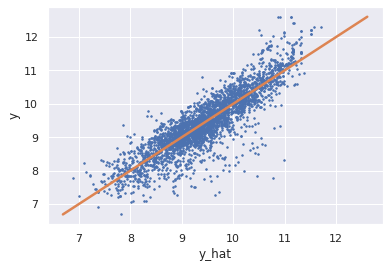

In [ ]:
y_hat = reg.predict(scaled_X_train)

plt.plot(y_hat, y_train, 'o', markersize=1.5)

min = np.amin([np.amin(y_hat), np.amin(y_train)])
max = np.amax([np.amax(y_hat), np.amax(y_train)])
plt.plot([min, max], [min, max], linewidth=2.5)

plt.xlabel('y_hat')
plt.ylabel('y')

plt.show()

Good fit. Check the residuals.

In [ ]:
resid = y_train - y_hat

pd.DataFrame({
    'descriptions' : describe(resid)._fields,
    'values' : describe(resid)})

,descriptions,values
0,nobs,3140
1,minmax,"(-2.996161680423649, 1.7232158738746026)"
2,mean,1.10315e-16
3,variance,0.203156
4,skewness,-0.87571
5,kurtosis,3.61328


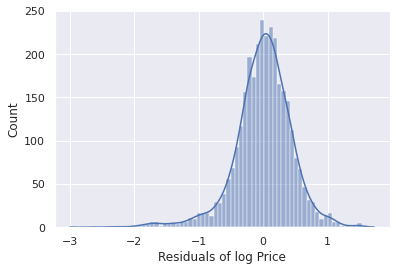

In [ ]:
sns.histplot(resid, kde=True)

plt.xlabel('Residuals of log Price')

plt.show()

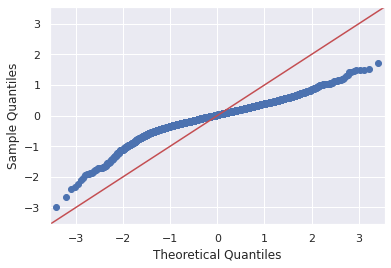

In [ ]:
sm.qqplot(resid, line='45')
plt.show()

In [ ]:
print(f'JB Test p-value = {jarque_bera(resid)[1]}')
print(f'KS Test p-value = {kstest(resid, "norm")[1]}')

JB Test p-value = 0.0
KS Test p-value = 3.6103344406471704e-127


The residual is not normally distributed.

In [ ]:
pd.DataFrame({
    'features' : X.columns.values,
    'weights' : reg.coef_
})

,features,weights
0,Mileage,-0.486332
1,EngineV,0.247481
2,Brand_BMW,0.025618
3,Brand_Mercedes-Benz,0.035467
4,Brand_Mitsubishi,-0.128985
5,Brand_Renault,-0.171481
6,Brand_Toyota,-0.052955
7,Brand_Volkswagen,-0.081350
8,Body_hatch,-0.136210
9,Body_other,-0.091467


In [ ]:
print(df['Brand'].unique())
# Audi is the benchmark

print(df['Body'].unique())
# crossover is the benchmark

print(df['Engine Type'].unique())
# Diesel is the benchmark

print(df['Registration'].unique())
# no is the benchmark

['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi']
['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']
['Petrol' 'Diesel' 'Gas' 'Other']
['yes' 'no']


### Test

In [ ]:
test_result = pd.DataFrame({
    'predicted_test' : np.exp(reg.predict(scaler.transform(X_test))),
    'actual_test' : np.exp(y_test),
    'residual_test' : np.exp(y_test)-np.exp(reg.predict(scaler.transform(X_test)))
    }).reset_index(drop=True)

test_result['absolute_error'] = np.absolute(test_result['residual_test'])

test_result['percentage_error'] = test_result['absolute_error']/test_result['actual_test']

test_result

,predicted_test,actual_test,residual_test,absolute_error,percentage_error
0,5639.299560,7450.0,1810.700440,1810.700440,0.243047
1,40418.596206,43500.0,3081.403794,3081.403794,0.070837
2,40864.535035,62000.0,21135.464965,21135.464965,0.340895
3,10254.273236,20500.0,10245.726764,10245.726764,0.499792
4,8166.423149,5400.0,-2766.423149,2766.423149,0.512301
...,...,...,...,...,...
780,7861.919686,11000.0,3138.080314,3138.080314,0.285280
781,7846.870363,9000.0,1153.129637,1153.129637,0.128126
782,13490.636026,13200.0,-290.636026,290.636026,0.022018
783,23958.321637,31900.0,7941.678363,7941.678363,0.248955


In [ ]:
test_result.describe()

,predicted_test,actual_test,residual_test,absolute_error,percentage_error
count,785.000000,785.000000,785.000000,785.000000,785.000000
mean,17628.557299,20770.692357,3142.135058,6977.524088,0.406342
std,16228.243469,28187.967217,17225.310813,16057.677190,1.020682
min,1056.565676,1199.000000,-45468.906685,13.066850,0.001163
25%,7140.730212,6900.000000,-1864.703768,968.929172,0.109453
50%,11794.618763,11800.000000,328.778477,2774.581443,0.233783
75%,22658.914093,23500.000000,3661.623504,6454.289172,0.389253
max,124146.624822,300000.000000,246928.055235,246928.055235,18.945378


In [ ]:
print(f"Explained variance: {explained_variance_score(test_result['actual_test'], test_result['predicted_test'])}")
print(f"R2 : {r2_score(test_result['actual_test'], test_result['predicted_test'])}")

Explained variance: 0.6265722236133029
R2 : 0.6141306367730901


## S36L238 Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [ ]:
df = pd.read_csv('/content/Example-bank-data.csv')

# Drop the first columns
df.drop(df.columns[0], axis=1, inplace=True)

df

,duration,y
0,117,no
1,274,yes
2,167,no
3,686,yes
4,157,no
...,...,...
513,204,no
514,806,yes
515,290,no
516,473,yes


Map the y column to 0s and 1s.

In [ ]:
df['y'] = df['y'].map({ 'no' : 0, 'yes' : 1})

In [ ]:
df.describe()

,duration,y
count,518.000000,518.000000
mean,382.177606,0.500000
std,344.295990,0.500483
min,9.000000,0.000000
25%,155.000000,0.000000
50%,266.500000,0.500000
75%,482.750000,1.000000
max,2653.000000,1.000000


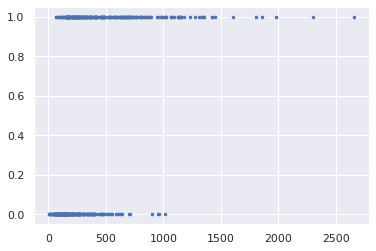

In [ ]:
plt.plot(df['duration'], df['y'], 'o', markersize=2.5)

plt.show()

In [ ]:
y, X = patsy.dmatrices('y ~ duration', data=df)

In [ ]:
model = sm.Logit(y, X)

result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.2121
Time:                        09:11:27   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

## S36L244 Binary Predictors in a Logistic Regression

Using the same code as in the previous exercise, find the odds of 'duration'. 

What do they tell you?

In [ ]:
# Run previous exercise
model = sm.Logit(y, X)

result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.2121
Time:                        09:11:27   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

The model is:
$$\log{Odd(\text{y})} = -1.7001 + 0.0051(\text{duration})$$

In [ ]:
np.exp(0.0051)

1.005113027136717

## S36L246 Calculating the Accuracy of the Model

Using the same dataset, expand the model by including all other features into the regression. 

Moreover, calculate the accuracy of the model and create a confusion matrix

In [ ]:
df = pd.read_csv('/content/Bank-data.csv')

df.drop(df.columns[0], axis=1, inplace=True)

df['y'] = df['y'].map({'no' : 0, 'yes' : 1})

df = df[df.columns[range(-1,len(df.columns)-1)]]

df

,y,interest_rate,credit,march,may,previous,duration
0,0,1.334,0.0,1.0,0.0,0.0,117.0
1,1,0.767,0.0,0.0,2.0,1.0,274.0
2,0,4.858,0.0,1.0,0.0,0.0,167.0
3,1,4.120,0.0,0.0,0.0,0.0,686.0
4,0,4.856,0.0,1.0,0.0,0.0,157.0
...,...,...,...,...,...,...,...
513,0,1.334,0.0,1.0,0.0,0.0,204.0
514,1,0.861,0.0,0.0,2.0,1.0,806.0
515,0,0.879,0.0,0.0,0.0,0.0,290.0
516,1,0.877,0.0,0.0,5.0,1.0,473.0


In [ ]:
df.describe()

,y,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,0.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,0.500483,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,0.000000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,0.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,1.000000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,1.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


In [ ]:
y, X = patsy.dmatrices('y ~ interest_rate + credit + march + may + previous + duration', data=df)

In [ ]:
model = sm.Logit(y, X)

result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      511
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.5153
Time:                        09:20:25   Log-Likelihood:                -174.02
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 7.579e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1385      0.339     -0.408      0.683      -0.804       0.527
interest_rate    -0.7802      0.092     -8.471      0.000      -0.961      -0.600
credit            2.4028      1.090      2.205      0.027       0.267       4.538
march            -1.8097      0.332     -5.459      0.000      -2.459      -1.160
may               0.1946      0.229      0.849      0.396      -0.255       0.644
previous          1.2746      0.583      2.186      0.029       0.132       2.417
duration          0.0070      0.001      9.386      0.000       0.006       0.008
=================================================================================
"""

may is not a significant feature. Remove it from the model.

In [ ]:
y, X = patsy.dmatrices('y ~ interest_rate + credit + march + previous + duration', data=df)

In [ ]:
model = sm.Logit(y, X)

result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.5143
Time:                        09:20:42   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
credit            2.3585      1.088      2.169      0.030       0.227       4.490
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

In [ ]:
cm = pd.DataFrame(result.pred_table())

cm.rename(index={0 : 'Actual 0', 1 : 'Actual 1'},
          columns={0 : 'Pred 0', 1 : 'Pred 1'}, inplace=True)

cm

,Pred 0,Pred 1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


In [ ]:
print(f'The accuracy is {round((cm.iloc[0,0]+cm.iloc[1,1])/cm.to_numpy().sum() * 100, 3)}%')

The accuracy is 86.293%


## S36L249 Testing the Model

In [ ]:
df_test = pd.read_csv('/content/Bank-data-testing.csv')

df_test.drop(df_test.columns[0], axis=1, inplace=True)

df_test['y'] = df_test['y'].map({'no' : 0, 'yes' : 1})

df_test = df_test[df_test.columns[range(-1,len(df_test.columns)-1)]]

df_test

,y,interest_rate,credit,march,may,previous,duration
0,0,1.313,0.0,1.0,0.0,0.0,487.0
1,0,4.961,0.0,0.0,0.0,0.0,132.0
2,0,4.856,0.0,1.0,0.0,0.0,92.0
3,1,4.120,0.0,0.0,0.0,0.0,1468.0
4,0,4.963,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...
217,1,4.963,0.0,0.0,0.0,0.0,458.0
218,1,1.264,0.0,1.0,1.0,0.0,397.0
219,0,1.281,0.0,1.0,0.0,0.0,34.0
220,0,0.739,0.0,0.0,2.0,0.0,233.0


In [ ]:
y, X = patsy.dmatrices('y ~ interest_rate + credit + march + previous + duration', data=df_test, return_type='dataframe')

y_hat = result.predict(X)

In [ ]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

confusion_matrix(X.to_numpy(),y.to_numpy().flatten(),result)

(array([[93., 18.],
        [13., 98.]]), 0.8603603603603603)

Good result. No over/underfitting in sight.

## S38L256 Simple Example of Clustering

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

In [ ]:
df = pd.read_csv('/content/Countries-exercise.csv')

df

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


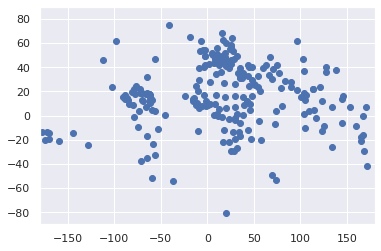

In [ ]:
plt.plot(df['Longitude'], df['Latitude'], 'o')

plt.xlim(-180,180)
plt.ylim(-90,90)

plt.show()

In [ ]:
X = df.iloc[:,1:]

X

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [ ]:
kmeans = KMeans(4)

pred = kmeans.fit_predict(X)

df['pred'] = pred

df

,name,Longitude,Latitude,pred
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,3
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


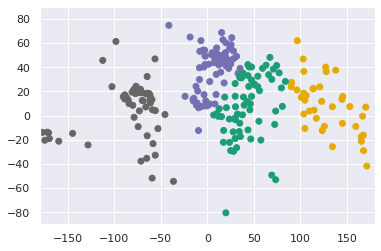

In [ ]:
plt.scatter(df['Longitude'], df['Latitude'], c=pred, cmap='Dark2')

plt.xlim(-180,180)
plt.ylim(-90,90)

plt.show()

## S38L260 How to Choose the Number of Clusters

In [ ]:
df = pd.read_csv('/content/Countries-exercise.csv')

df

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [ ]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)

    X = df.iloc[:,[1,2]]

    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

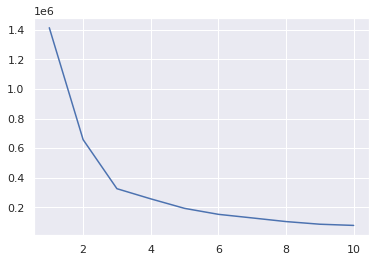

In [ ]:
plt.plot(range(1,11), wcss)

plt.show()

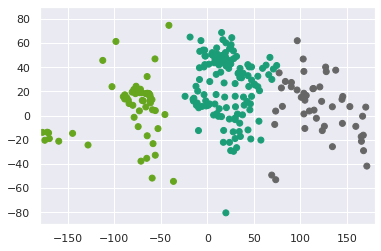

In [ ]:
kmeans = KMeans(3)

pred = kmeans.fit_predict(X)

plt.scatter(df['Longitude'], df['Latitude'], c=pred, cmap='Dark2')

plt.xlim(-180,180)
plt.ylim(-90,90)

plt.show()

## S38L267 Species Segmentation with Cluster Analysis Part 1

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


In [ ]:
df = pd.read_csv('/content/iris-dataset.csv')

df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


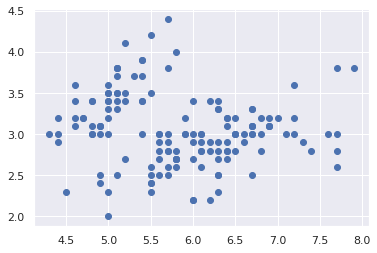

In [ ]:
df_sepal = pd.DataFrame({
    'length' : df['sepal_length'],
    'width' : df['sepal_width']
})

plt.scatter(df_sepal['length'], df_sepal['width'])

plt.show()

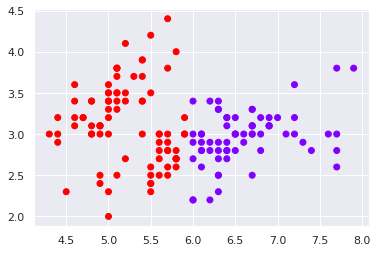

In [ ]:
kmeans = KMeans(2)

pred = kmeans.fit_predict(df_sepal)

plt.scatter(df_sepal['length'], df_sepal['width'], c=pred, cmap='rainbow')

plt.show()

Scale the data and rerun the algorithm.

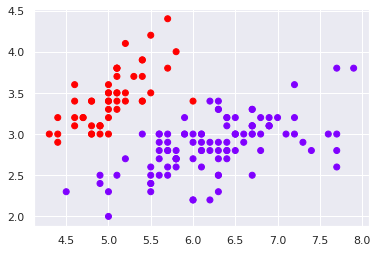

In [ ]:
pred = kmeans.fit_predict(scale(df_sepal))

plt.scatter(df_sepal['length'], df_sepal['width'], c=pred, cmap='rainbow')

plt.show()

Elbow method.

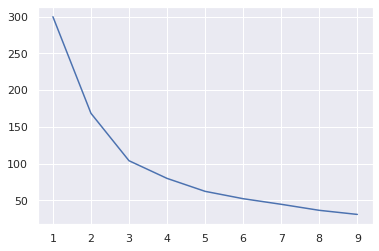

In [ ]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)

    kmeans.fit(scale(df_sepal))

    wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss)

plt.show()

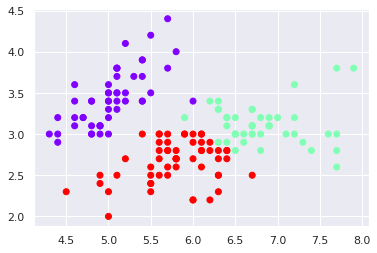

In [ ]:
kmeans = KMeans(3)

pred = kmeans.fit_predict(scale(df_sepal))

plt.scatter(df_sepal['length'], df_sepal['width'], c=pred, cmap='rainbow')

plt.show()

## S38L268 Species Segmentation with Cluster Analysis Part 2

You have already solved the first exercise, so you can start from there (you've done taken advantage of the Elbow Method).

Plot the data with 2, 3 and 5 clusters. What do you think that means?

Finally, import the CSV with the correct answers (iris_with_answers.csv) and check if the clustering worked as expected. Note that this is not how we usually go about clustering problems. If we have the answers prior to that, we would go for classification (e.g. a logistic regression).

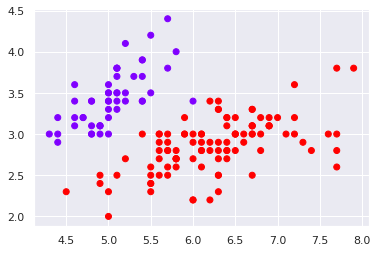

In [ ]:
# Run the previous exercise
kmeans = KMeans(2)

pred = kmeans.fit_predict(scale(df_sepal))

plt.scatter(df_sepal['length'], df_sepal['width'], c=pred, cmap='rainbow')

plt.show()

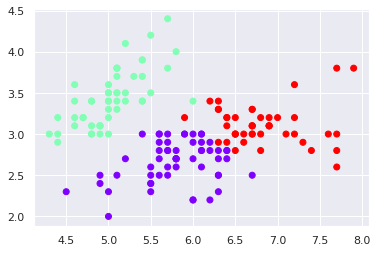

In [ ]:
kmeans = KMeans(3)

pred = kmeans.fit_predict(scale(df_sepal))

plt.scatter(df_sepal['length'], df_sepal['width'], c=pred, cmap='rainbow')

plt.show()

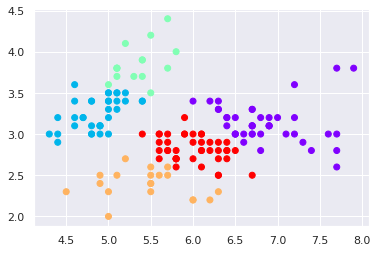

In [ ]:
kmeans = KMeans(5)

pred = kmeans.fit_predict(scale(df_sepal))

plt.scatter(df_sepal['length'], df_sepal['width'], c=pred, cmap='rainbow')

plt.show()

In [ ]:
ans = pd.read_csv('/content/iris-with-answers.csv')

ans['species'] = ans['species'].map({'setosa' : 0, 'virginica' : 1, 'versicolor' : 2})

ans

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


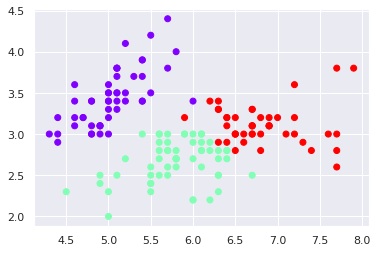

In [ ]:
kmeans = KMeans(3)

pred = kmeans.fit_predict(scale(df_sepal))

plt.scatter(df_sepal['length'], df_sepal['width'], c=pred, cmap='rainbow')

plt.show()

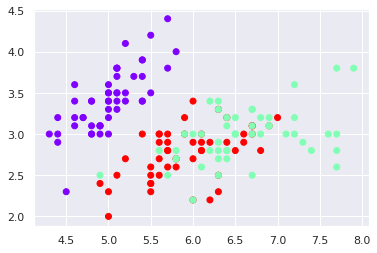

In [ ]:
plt.scatter(ans['sepal_length'], ans['sepal_width'], c=ans['species'], cmap='rainbow')

plt.show()

# Part 7 Deep Learning

## Initialisation

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf

## S43L300 Basic NN With NumPy

Let the true model be:

$$
\mathbf{f}(\mathbf{x},\mathbf{y}) = \begin{bmatrix} \mathbf{x} & \mathbf{y} \end{bmatrix} \begin{bmatrix} 13 \\ 7 \end{bmatrix} - \begin{bmatrix} 12 \end{bmatrix}
$$

In [ ]:
n = 1000

# Random input
x = np.random.uniform(-10, 10, size=(n,1))
z = np.random.uniform(-10, 10, size=(n,1))

input = np.column_stack((x,z))

# Random target with noise
target = np.dot(input, np.array([13,7]).reshape(2,1)) - 12 + np.random.uniform(-1, 1, (n,1))

In [ ]:
# Set a random initial guess for the weights and bias

weight = np.random.random(size=(input.shape[1],1))
bias = np.random.random(size=(1,1))

print(f'Initial weight: \n {weight}')
print()
print(f'Initial bias: \n {bias}')

Initial weight: 
 [[0.43303896]
 [0.98749194]]

Initial bias: 
 [[0.2261599]]


In [ ]:
learning_rate = 0.02

L2-Norm has form:
$$
L(\hat{y}, y) = \frac{(\hat{y}-y)^2}{2}
$$

Suppose the data follows the linear model:
$$
\hat{y} = \mathbf{x}~\mathbf{\text{weight}} + \text{bias}
$$

Then,
$$
{L_\mathbf{\text{weight}}}(\mathbf{x}, \mathbf{\text{weight}}, \text{bias}, y) = \mathbf{x}^T\mathbf{\delta} \\ {L_\mathbf{\text{bias}}}(\mathbf{x}, \mathbf{\text{weight}}, \text{bias}, y) = \mathbf{\delta}
$$

In [ ]:
for i in range(100000):
    output = input @ weight + bias

    delta = (output-target) / n

    # The summation of weight is automatically
    # carried out in the matrix multiplication
    weight = weight - learning_rate*(input.T @ delta)
    # but not here since there is no matrix multiplication
    bias = bias - learning_rate*np.sum(delta)

print(weight)
print(bias)

[[13.00265645]
 [ 6.99919719]]
[[-11.97680783]]


## S44L309 Basic NN With TensorFlow

In [ ]:
n = 1000

# Random input
x = np.random.uniform(-10, 10, size=(n,1))
z = np.random.uniform(-10, 10, size=(n,1))

input = np.column_stack((x,z))

# Random target with noise
target = np.dot(input, np.array([13,7]).reshape(2,1)) - 12 + np.random.uniform(-1, 1, (n,1))

np.savez('TF_intro', inputs=input, targets=target)

In [ ]:
data = np.load('/content/TF_intro.npz')

input_size = 2
output_size = 1

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)                 # You can set the kernel initialiser here
                            ])

model.compile(optimizer='sgd',                                                  # The Optimizer object
              loss='mean_squared_error')                                        # The Loss object

model.fit(data['inputs'], data['targets'], epochs=100, verbose=0)

In [ ]:
model.layers[0].get_weights()

[array([[12.990369],
        [ 6.998685]], dtype=float32), array([-12.011655], dtype=float32)]